In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# ME 270 - Activity 1 - Shear Force and Bending Moment Diagrams

In this activity, we will provide a basic introduction to Python programming motivated by the goal of plotting shear-force and bending-moment diagrams.

We see here below a beam with an applied load and an applied moment at some arbitrary points.

<figure>
 <img src="https://raw.githubusercontent.com/ebilionis/core-me-data-science-activities-public/refs/heads/main/images/Statics1_beam.png" width="700" height="300">
</figure>

We will calculate the shear force and bending moment at different points along the beam and plot the diagrams.


### Question 1 - Basic Python Syntax

Let's first review some basic Python syntax, starting with variable assignment. It is always good practice to assign variables and not hard-code values in your calculations. It is also good practice to use meaningful variable names and comments to explain the purpose of the variable and the units of the value.

In [2]:
# Dimension of beam AD
d_ab = 6 # m
d_bc = 3.0 # m
d_cd = 6.0 # m

Exploring variable types and operations is also important. Types are implicit in Python, but you can always check the type of a variable using the `type()` function.

In [3]:
type(d_ab)

int

In [4]:
type(d_bc)

float

In [5]:
type(d_cd)

float

Do you see why `d_ab` is an integer and `d_cd` is a float? When we assigned the value of `d_ab` we use did not use a decimal point, so Python interprets it as an integer. When we assigned the value of `d_cd` we used a decimal point, so Python interprets it as a float. We can also convert between types using the `int()` and `float()` functions.

In [6]:
d_cd = int(d_cd)
type(d_cd)

int

Understanding the types of variables is important because it determines how they can be used in calculations. Let's add up our three segment lengths to find the total length of the beam.

In [7]:
L = d_ab + d_bc + d_cd
type(L)

float

So what is happening here is that the integer `d_ab` is being added to the float `d_cd` and the result is a float. This is because Python will always convert the integer to a float when adding it to a float.

Other operations like subtraction, multiplication, division, and exponentiation work similarly. Let me show you the python syntax for these operations.

In [8]:
x = 5.0 - 2
x

3.0

In [9]:
y = 2 * 3.0
y

6.0

In [10]:
z = 5.0 / 2
z

2.5

Note that the `**` operator is used for exponentiation in Python. Not the `^` operator as in some other programming languages. The `^` operator is used for bitwise XOR in Python.

In [11]:
a = 2. ** 3
a

8.0

Let's use some of the operations that we learned to do some calculations about our beam. Let's start with a moment calculation. We know that in equilibrium, the sum of the moments about any point must be zero. Let's calculate the moment about point A.

$$
\sum M = 0
$$

$$
\sum M = M_c - (F_b)(d_{ab}) + (B_y)(L)
$$

Where we have some known applied moment $M_c$, a known applied force $F_b$, and we can calculate the reaction force $B_y$.

Let's rearrange for $B_y$

$$
B_y = \frac{F_b d_{ab} - M_c}{L}
$$

Let me assign some values to these variables and calculate the reaction force $B_y$.

In [12]:
# Applied force at point B
F_b = 10.0 # kN

# Applied moment at point C
M_c = 30.0 # kN*m

# Solve for the reaction force By
B_y = (F_b * d_cd - M_c) / L
B_y

2.0

Now, we have done this calculation, I want to see the value of the reaction force $B_y$. Let's look at a nicer way to print the value of a variable using the `print()` function.

In [13]:
print(f"The y component reaction force at point B = {B_y:.2f} kN")

The y component reaction force at point B = 2.00 kN


Notice all of the different ways we can format the output. The `f-string` method is the most modern and most readable. You are maintaining the flexibility, not hard-coding the variable name, and you can format the output to a specific number of decimal places, given by the number after the colon. Let me show you how we can change the output to different decimal places.

In [14]:
print(f"The y component reaction force at point B = {B_y:.5f} kN")

The y component reaction force at point B = 2.00000 kN


Or using scientific notation.

In [15]:
print(f"The y component reaction force at point B = {B_y:.2e} kN")

The y component reaction force at point B = 2.00e+00 kN


Now I want you do use what we have learned to calculate the reaction force $A_y$.

Print out the value to 2 decimal places, also print out the type of the variable using the print function.

In [16]:
A_y = F_b - B_y
print(f"The y component reaction force at point A = {A_y:.2f} kN")
print(f"Type = {type(A_y)}")

The y component reaction force at point A = 8.00 kN
Type = <class 'float'>


### Question 2 - Data Structures

We will need to organize our data in a way that makes it easy to calculate the shear force and bending moment at different points along the beam. Let's start reviewing some basic data structures in Python.

Tuples are ordered collections of elements that are immutable. This means that once you create a tuple, you cannot change the elements inside it. You can access elements of a tuple using indexing, slicing, or unpacking.

Let's make a tuples of our distances.

In [17]:
# Construct a tuple of the distances
ds = (d_ab, d_bc, d_cd)
type(ds)

tuple

We can recover an element from the tuple using indexing. Remember that Python indexing starts at 0.

In [18]:
d = ds[0]
print(f'The first element of ds is {d}')

The first element of ds is 6


Let me show you what I mean by tuples being immutable. Let's try to change the value of the first element of the tuple.

In [20]:
# Modify the first element of ds
new_d = 10.0 # m

# Attempt to modify the first element of ds
try:
    ds[0] = new_d
except TypeError as e:
    print(f"TypeError: {e}")

TypeError: 'tuple' object does not support item assignment


If we want to change the value of an element in a collection, we should use a list. Lists are ordered collections of elements that are mutable. We use a `[]` to form lists rather than the `()` that we use to form tuples. This means that you can change the elements inside a list. You can access elements of a list using indexing, slicing, or unpacking.

In [21]:
# Construct a list of the distances
ds = [d_ab, d_bc, d_cd]
type(ds)

list

Here, we can easily change and element of the list. Just to show you some other ways to index a list, let's change the last element of the list.

In [22]:
# Create the new distance
new_d = 10.0 # m

# Modify the last element of ds
ds[-1] = new_d
print(f'The modified list of distances is {ds}')

The modified list of distances is [6, 3.0, 10.0]


The last basic data structure we will review is the dictionary. Dictionaries are unordered collections of key-value pairs. You can access the value of a key using indexing. Let's create a dictionary of the distances and applied loads on the beam. We create a dictionary using `{}` and separate the key-value pairs with a `:`. So the strings in the dictionary are the keys and the values are the numbers.

In [23]:
# Create a dictionary of the beam properties
beam = {'d_ab': 6.0, 'd_bc': 3.0, 'd_cd': 6.0, 'F_b': 10.0, 'M_c': 30.0}

We can access a value in the dictionary using the key.

In [24]:
# Access the value of the applied force at point B
F_b = beam['F_b']
print(f'The applied force at point B is {F_b} kN')

The applied force at point B is 10.0 kN


These structures are very useful for organizing data and can be nested inside each other to create more complex data structures. Let's create a dictionary with a tuple of the distances and a list of the applied loads, and a dictionary of the reaction forces.

In [25]:
# Create a nested dictionary of the beam properties
beam = {'distances': ds, 'applied': [F_b, M_c], 'reactions': {'A_y': A_y, 'B_y': B_y}}

# Access the value of the reaction force at point A
A_y = beam['reactions']['A_y']
print(f'The reaction force at point A is {A_y} kN')

The reaction force at point A is 8.0 kN


I want you to create a nested dictionary with the courses that you are taking this semester. This should include the course name, the instructor's name, and how much you are liking it on a scale of 1 to 10. Then I want you to extract the course numbers and print the sum.

In [34]:
courses = {
    'ITAL 20100': {
        'course_name': 'Italian III',
        'instructor_name': 'Brett Bogart',
        'enjoyableness': 7
    },
    'ME 27000': {
        'course_name': 'Basic Mechanics I',
        'instructor_name': 'Shirley Dyke',
        'enjoyableness': 8
    },
    'BAND 11300': {
        'course_name': 'Purdue Jazz Band',
        'instructor_name': 'Bethany Robinson',
        'enjoyableness': 9
    },
    'CS 15900': {
        'course_name': 'C Programming',
        'instructor_name': 'Xiaojin Lou',
        'enjoyableness': 6
    },
    "MA 26200": {
        'course_name': 'Lin Alg Diff Equats',
        'instructor_name': 'Ying Chen',
        'enjoyableness': 7
    },
    'EPCS 12100': {
        'course_name': 'First Yr EPICS',
        'instructor_name': 'Haley Culter',
        'enjoyableness': '5'
    }
}

total_num = 0

for course in courses:
  total_num += int(course[-5:] )
#im honestly proud of this one tbh

print(f"Sum of course numbers: {total_num}")

Sum of course numbers: 112600


### Question 3 - Control Structures

For loops, conditional statements, and functions are the basic control structures in Python. Let's start with for loops. For loops are used to iterate over a sequence of elements. You can use a for loop to iterate over a list, tuple, or dictionary.

Let's iterate over the distances tuple and convert it to different units.

In [33]:
# Initalize a list to store the distances in cm
ds_cm = []

# Iterate over each distance in the list
for d in ds:
    ds_cm.append(d * 100)

print(f'The distances in cm are {ds_cm}')

The distances in cm are [600, 300.0, 1000.0]


Python has in-line for loops called list comprehensions. These are a more concise way to write for loops. Let's convert the distances tuple to a list using a list comprehension. Writing code like this is more "Pythonic" and is generally preferred.

In [35]:
# Create a list comprehension to convert the distances to cm
ds_cm = [d * 100 for d in ds]

Let's integrate loops with conditional statements. Conditional statements are used to execute different blocks of code based on the truth value of a condition. The basic conditional statements in Python are `if`, `elif`, and `else`.

In [36]:
# Loop through applied and reaction forces
for key, value in beam.items():
    if key == 'applied':
        print(f'The applied forces are {value}')
    elif key == 'reactions':
        print(f'The reaction forces are {value}')
    else:
        print(f'The distances are {value}')

The distances are [6, 3.0, 10.0]
The applied forces are [10.0, 30.0]
The reaction forces are {'A_y': 8.0, 'B_y': 2.0}


I want you to use loops and conditional statements to convert the forces from kN to N, reassign the values to the dictionary, and print the dictionary.

In [44]:
# Loop through applied and reaction forces
for key, value in beam.items():
    if key == 'applied':
        value = [force / 1000 for force in value]
        print(f'The applied forces are {value}')
    elif key == 'reactions':
        value = {key: force / 1000 for key, force in value.items()} #honestly proud of this one too
        print(f'The reaction forces are {value}')
    else:
        print(f'The distances are {value}')

The distances are [6, 3.0, 10.0]
The applied forces are [0.01, 0.03]
The reaction forces are {'A_y': 0.008, 'B_y': 0.002}


### Question 4 - Functions

In order to calculate the shear force and bending moment at different points along the beam, we will need to write functions to perform these calculations. Functions are reusable blocks of code that perform a specific task. They can take arguments and return values.

The shear force at point B is a trivial calculation. The sum of the forces in the y-direction must be zero.

$$
\sum F_y = 0
$$

$$
\sum F_y = A_y - V_{AB}
$$

Where $V_{AB}$ is the shear force at point B. Let's solve for $V_{AB}$.

In [45]:
def calc_V_ab(A_y):
    """
    Calculate the shear force at point B.

    Parameters:
    A_y : float
        The reaction force at point A in kN.

    Returns:
    V_ab : float
        The shear forcein kN.
    """
    V_ab = A_y
    return V_ab

V_b = calc_V_ab(A_y)
print(f'The shear force at point B is {V_b} kN')

The shear force at point B is 8.0 kN


The function begins with the `def` keyword, followed by the function name and the arguments in parentheses. Following is what is called a docstring, which is a string that describes the purpose of the function. It is best practice to include a docstring in your functions, so that others can understand what the function does.
The function body is indented. The function returns a value using the `return` keyword.

Let's do it again for the shear force at point C.

In [46]:
def calc_V_bc(F_b, A_y):
    """
    Calculate the shear force at point C.

    Parameters:
    F_b : float
        The applied force at point B in kN.
    A_y : float
        The reaction force at point A in kN.

    Returns:
    V_bc : float
        The shear force in kN.
    """
    V_bc = A_y - F_b
    return V_bc

V_c = calc_V_bc(F_b, A_y)
print(f'The shear force at point C is {V_c} kN')

The shear force at point C is -2.0 kN


I want you to write functions to calculate the bending moment in the rest of the beam.

In [75]:
def calc_bending_moment(distance):

  # moment at C is M_c = 30 kNm (at x = 9)
  # moment from x = 0 to x = 9 (point C) is M(x) = 8x
  # moment from x = 9 to x = 15 (end) is M(x) = 48-2x

  if 0 <= distance <= 6:
    return 8 * distance
  elif 6 <= distance <= 9:
    return 60 - 2 * distance
  elif 9 < distance <= 15:
    return 48 - 2 * distance
  else:
    return 'not a valid distance.'

### Question 5 - Plotting shear force and bending moment diagrams

Great! Now we can put it all together to plot the shear force and bending moment diagrams. We will use the `matplotlib` library to plot the diagrams and `numpy` to help assist with our numerical computations. I have imported the libaries already, but when you are working on your own, you will need to import them.

We want to plot at arbitrary points along the beam, so we will need to create an array of x-values. We can use the `np.linspace()` function to create an array of evenly spaced values along the length of the beam

In [55]:
x = np.linspace(0, L, 100)

I am going to create the shear force diagram for you. First let's initalize our shear force array.

In [59]:
shear = np.zeros_like(x)

Now we will loop through the x-values and calculate the shear force at each point. We will use the conditionals to determine which function to use at each segment.

In [57]:
for i, xi in enumerate(x):
    if xi <= d_ab:
        shear[i] = calc_V_ab(A_y)
    else:
        shear[i] = calc_V_bc(F_b, A_y)

Let's plot the shear force diagram. Always title your plot and label your axes with units. A lot of the rest of plotting is just formatting the plot to make it look nice.

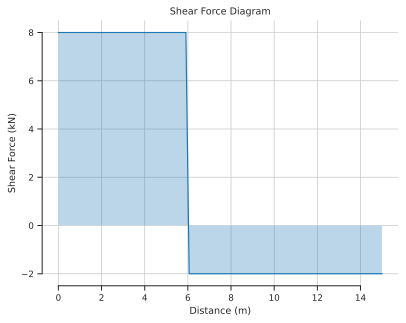

In [58]:
# Create a figure and axis
fig, ax = plt.subplots()
# Plot the shear force diagram
ax.plot(x, shear)
# Shades between the x-axis and our shear force curve
ax.fill_between(x, shear, 0, alpha=0.3)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Shear Force (kN)')
ax.set_title('Shear Force Diagram')
ax.grid(True)
sns.despine(trim=True)
plt.show()

I want you to make the plot for the bending moment diagram. Be careful with the applied moment at point C.

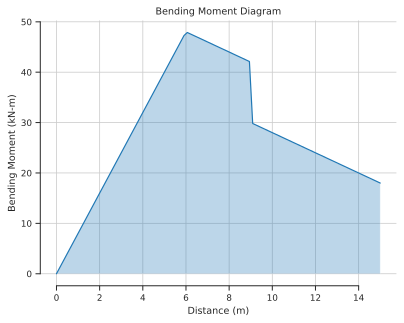

In [76]:
x = np.linspace(0, L, 100)
bending_moment = np.zeros_like(x)

for i, xi in enumerate(x):
  bending_moment[i] = calc_bending_moment(xi)


# Create a figure and axis
fig, ax = plt.subplots()
# Plot the shear force diagram
ax.plot(x, bending_moment)
# Shades between the x-axis and our shear force curve
ax.fill_between(x, bending_moment, 0, alpha=0.3)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Bending Moment (kN-m)')
ax.set_title('Bending Moment Diagram')
ax.grid(True)
sns.despine(trim=True)
plt.show()